In [1]:
import database as db
from torchvision import transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import numpy as np

In [3]:
fruits_file = 'Dataset/dataset_index.csv'
textures_file = 'Dataset/textures_index.csv'
fruits_path = 'Dataset/fruits-360'
textures_path = 'Dataset/textures'

In [4]:
fruits_avocado_orange = db.FruitsDataset(csv_file=fruits_file,
    cl_A='Peach', cl_B='Orange')

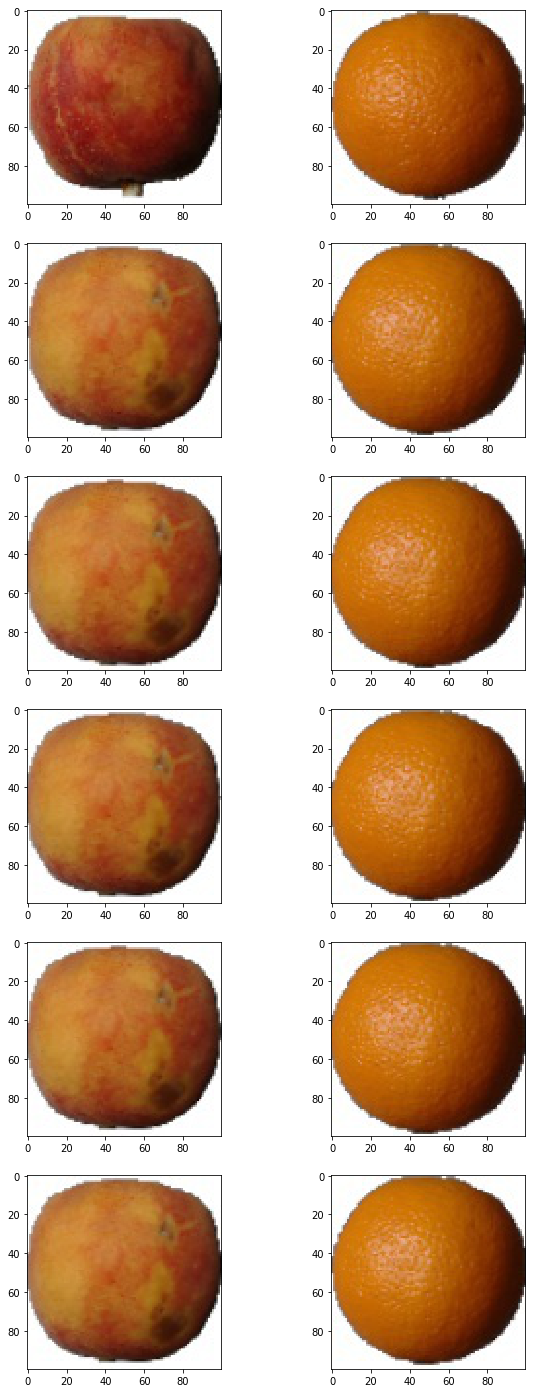

In [5]:
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(10,25))
for i in range(len(fruits_avocado_orange)):
    sample = fruits_avocado_orange[i]
    ax[i,0].imshow(sample[0])
    ax[i,1].imshow(sample[1])
    if i == 5:
        plt.show()
        break

In [6]:
textures = db.TexturesDataset(csv_file=textures_file)

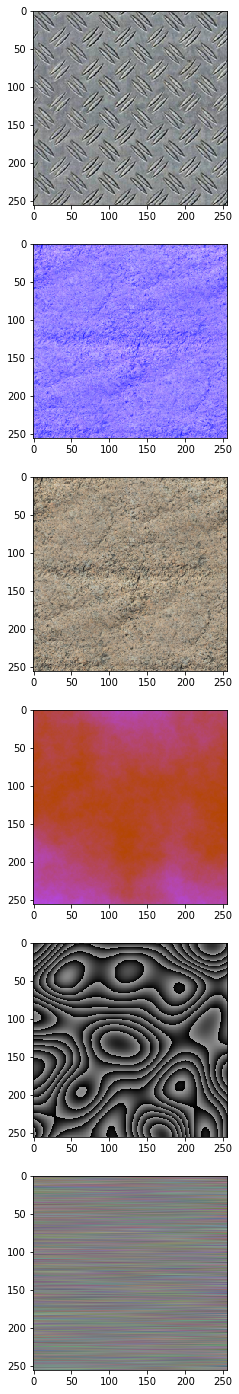

In [7]:
fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(10,25))

for i in range(len(textures)):
    sample = textures[i]
    ax[i].imshow(sample)
    if i == 5:
        plt.show()
        break

In [8]:
test = db.FruitsDataset(csv_file=fruits_file, cl_A='Peach', cl_B='Orange', 
                        transform = transforms.Compose([db.ChangeBackground(textures)]))

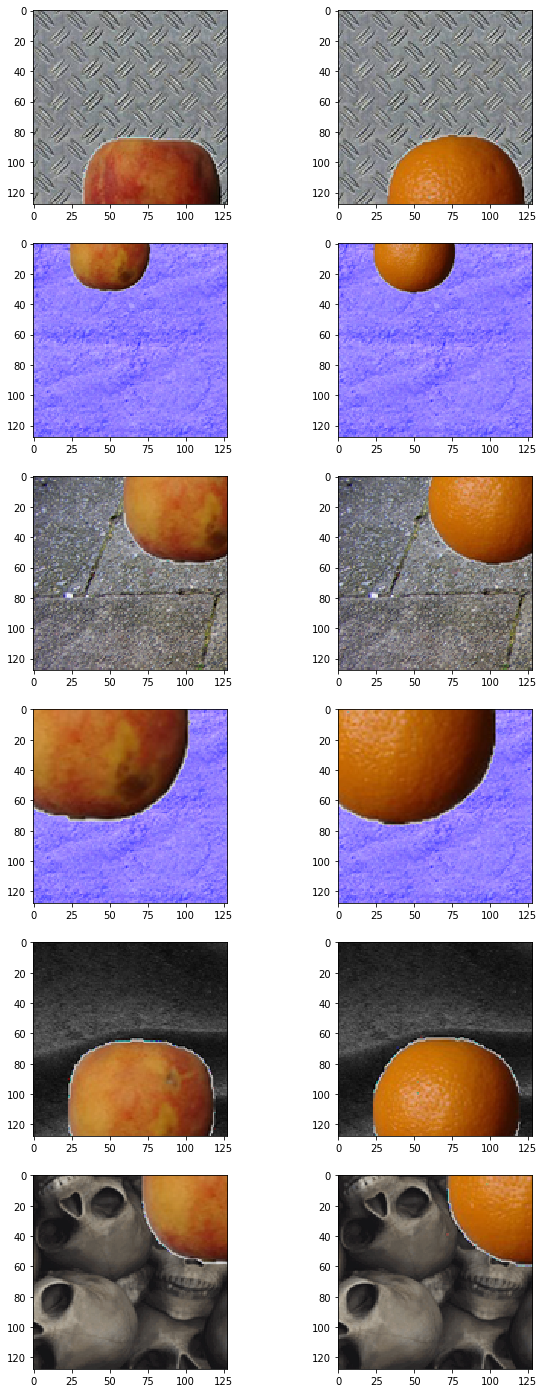

In [9]:
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(10,25))

for i in range(len(test)):
    sample = test[i]
    ax[i,0].imshow(sample[0]+0.5)
    ax[i,1].imshow(sample[1]+0.5)
    if i == 5:
        plt.show()
        break

## Use dataloader for loading batches of data randomly

In [10]:
dataloader = DataLoader(test, batch_size=20,
                        shuffle=True, num_workers=4)

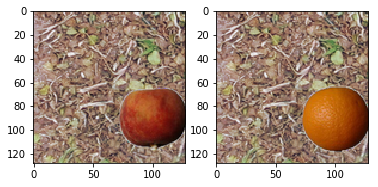

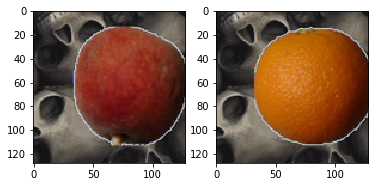

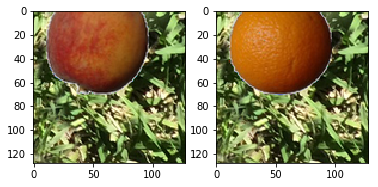

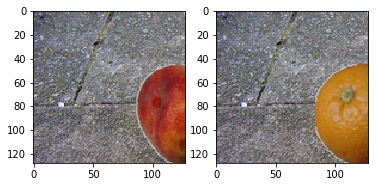

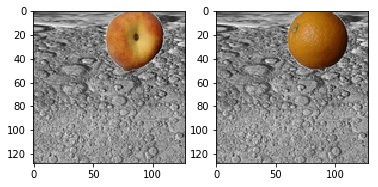

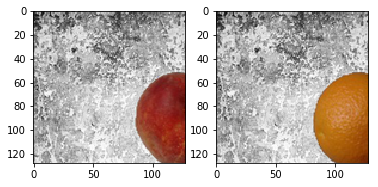

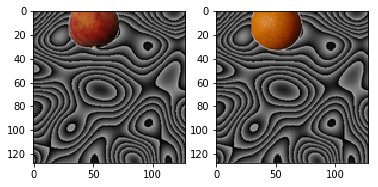

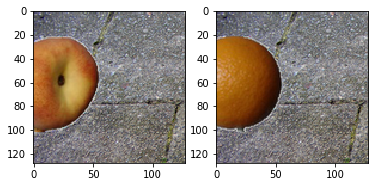

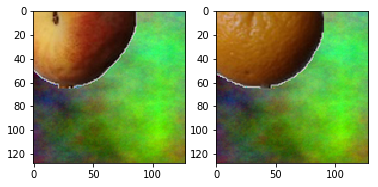

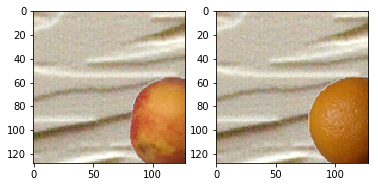

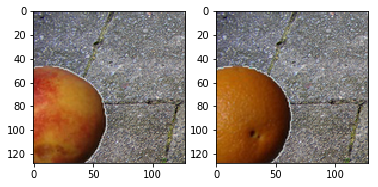

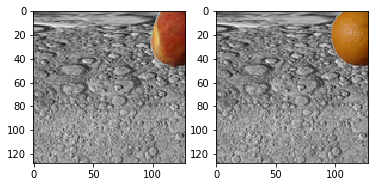

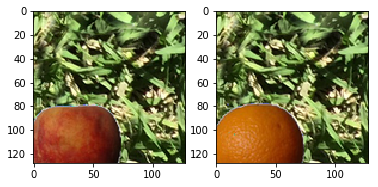

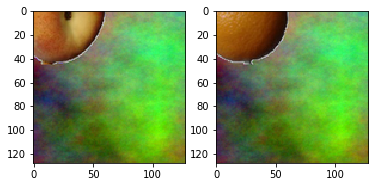

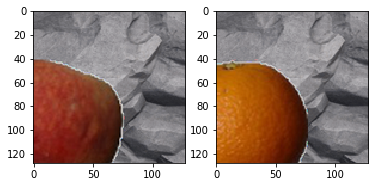

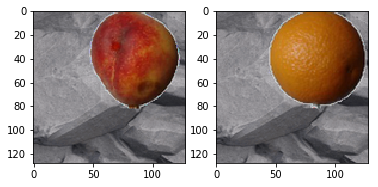

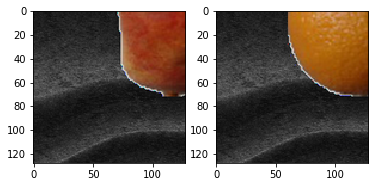

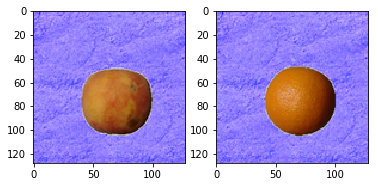

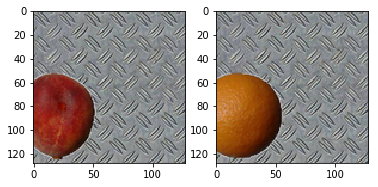

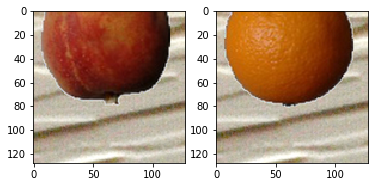

In [11]:
for i_batch, sample_batched in enumerate(dataloader):
    if i_batch == 5:
        n_elems = len(sample_batched[0])
        for j in range(n_elems):
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(np.array((sample_batched[0][j]+0.5) * 255.0).astype(int))
            ax[1].imshow(np.array((sample_batched[1][j]+0.5) * 255.0).astype(int))

In [13]:
imgs = next(iter(dataloader))

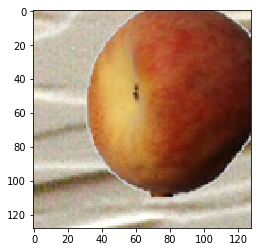

In [20]:
plt.imshow(imgs[0][0]+0.5)
plt.show()